In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
DATADIR = "/home/fw2ty/Documents/Studio/fruits/fruits-360_dataset/fruits-360/"

TRAINDIR = os.path.join(DATADIR, 'Training')
TESTDIR = os.path.join(DATADIR, 'Test')

In [3]:
classes_all = []
for folder in os.listdir(TRAINDIR):
    classes_all.append(folder)
    
# print(classes_all)

classes = ['Apple Red 3', 'Kiwi','Banana','Orange', 'Grape White 2' ]


In [4]:
train_images, train_labels = [], []
test_images, test_labels = [], []
for folder in os.listdir(TRAINDIR):
    if folder in classes:
        path = os.path.join(TRAINDIR,folder)
        for img in os.listdir(path):
            train_images.append(cv2.imread(os.path.join(path, img)))
            train_labels.append(folder)

for folder in os.listdir(TESTDIR):
    if folder in classes:
        path = os.path.join(TESTDIR,folder)
        for img in os.listdir(path):
            test_images.append(cv2.imread(os.path.join(path, img)))
            test_labels.append(folder)
            
            
# print(len(train_images))
# print(len(train_labels))
# print(len(test_images))
# print(len(test_labels))
# plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(test_labels)
# print(train_images[0].shape)


IMG_SIZE = 100

resized_train = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in train_images]
resized_test = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in test_images]
# plt.imshow(cv2.cvtColor(resized[1800], cv2.COLOR_BGR2RGB))
# plt.show()

In [5]:
resized_train = np.asarray(resized_train)
resized_test = np.asarray(resized_test)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

# print(train_labels.shape)
# print(test_labels.shape)
# print(resized_train.shape)
# print(resized_test.shape)

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)


y_train_one_hot = to_categorical(train_labels)
y_test_one_hot = to_categorical(test_labels)


/home/fw2ty/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fw2ty/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fw2ty/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fw2ty/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [7]:
resized_train = resized_train / 255
resized_test = resized_test / 255

In [8]:
print(resized_train.shape)
print(resized_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(2354, 100, 100, 3)
(792, 100, 100, 3)
(2354, 5)
(792, 5)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [10]:
model.add(Conv2D(IMG_SIZE, (5, 5), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(resized_train, y_train_one_hot, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(resized_train, y_train_one_hot, test_size=0.3)

hist = model.fit(X_train, y_train, 
           batch_size=256, epochs=20, shuffle=True, validation_data=(X_val, y_val))

Train on 1506 samples, validate on 377 samples
Epoch 1/20
1506/1506 [==============================] - 65s 43ms/sample - loss: 1.5955 - acc: 0.2483 - val_loss: 1.5607 - val_acc: 0.3369
Epoch 2/20
1506/1506 [==============================] - 65s 43ms/sample - loss: 1.5400 - acc: 0.2490 - val_loss: 1.5152 - val_acc: 0.2679
Epoch 3/20
1506/1506 [==============================] - 61s 41ms/sample - loss: 1.4971 - acc: 0.2736 - val_loss: 1.4762 - val_acc: 0.3236
Epoch 4/20
1506/1506 [==============================] - 59s 39ms/sample - loss: 1.4597 - acc: 0.4475 - val_loss: 1.4404 - val_acc: 0.4111
Epoch 5/20
1506/1506 [==============================] - 59s 39ms/sample - loss: 1.4240 - acc: 0.6109 - val_loss: 1.4047 - val_acc: 0.5093
Epoch 6/20
1506/1506 [==============================] - 59s 39ms/sample - loss: 1.3879 - acc: 0.6713 - val_loss: 1.3682 - val_acc: 0.5703
Epoch 7/20
1506/1506 [==============================] - 59s 39ms/sample - loss: 1.3493 - acc: 0.6733 - val_loss: 1.3286 - val

In [38]:
model.evaluate(resized_test, y_test_one_hot)[1]

792/792 [==============================] - 8s 10ms/sample - loss: 0.6706 - acc: 0.8763


[0.6705725259251065, 0.8762626]

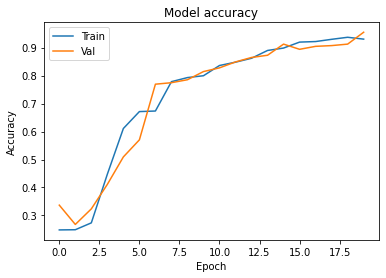

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

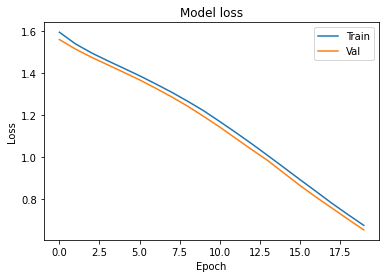

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

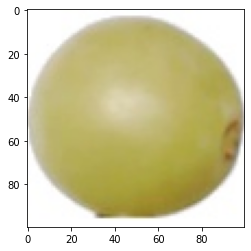

In [64]:
testt = resized_test[628]
plt.imshow(cv2.cvtColor(testt.astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
probabilities = model.predict(np.array( [testt,] ))
index = np.argsort(probabilities[0,:])
print(index)
print("Most likely class:", classes[index[0]], "-- Probability:", probabilities[0,index[4]])

[4 0 3 1 2]
Most likely class: Grape White 2 -- Probability: 0.50409573


In [43]:
probabilities

array([[0.11437178, 0.17428832, 0.53642154, 0.125985  , 0.04893336]],
      dtype=float32)